  <h1><font color='red'><center>APPLIED STATISTICS PROJECT</center></font></h1>
  

## <font color='red'>1.Import the necessary libraries</font> 

### The necessary libraries to perform the tasks given in the project are: Numpy, Pandas,  matplotlib,seaborn and scipy.stats which are imported below

In [1]:
import numpy as np #Numpy to perform mathmatical operations
import pandas as pd # Pandas to work on data-frames and perform EDA
import matplotlib.pyplot as plt # To visualize our data and all the relations among them
import seaborn as sns # To visualize our data and all the relations among them in an advanced way
import scipy.stats as stats # To perform our statistical tests and operations
sns.set_style(style='darkgrid')

### There are two more libraries that we would need to import to perform our proportions test and ANOVA tests, which we will import just before those operations

## <font color='red'>2. Read the data as a data frame</font>

### The file has been read below as df using the pandas library and since the data was stored somewhere else in my computer, I have to give the complete path to read it and then I have used head() function to see first 5 rows of the data set.

In [2]:
df = pd.read_csv(r"C:/Users/AK/Downloads/insurance (2).csv") #Reading the data in a data-frame 'df'

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <font color='red'>3. Perform basic EDA which should include the following and print out your insights at every step.</font>

## <font color='red'>a. Shape of the data</font>

### The data set has 1338 rows and 7 columns

In [4]:
df.shape

(1338, 7)

## <font color='red'>b. Data type of each attribute</font>

### This could be done using either of the methods below (either by df.dtypes or by df.info():

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info() #This is a more common method to know the data-type of each attribute, since it can tell
          # shape, data-type and missing values in the dataframe together. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## <font color='red'>c. Checking the presence of missing values</font>

### Presence of missing values in each attribute can be found using either isnull() function or isna() function and then we can use sum() to count the number of missing values in each attribute. In this data-set, there is no missing value as shown below:

In [7]:
#Finding Missing values in all attributes
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## <font color='red'>d. 5 point summary of numerical attributes</font>

### The simplest way to get the 5-point summary of all the numerical attributes is by using describe() function. 

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### If we are interested in any individual attribute, we can individually calculate all the 5-points using min(), max() and quantile/percentile functions. (I have calculated it for 1 attribute. It could be done for all numerical attributes.)

In [9]:
print('The youngest person in the dataset is:', df['age'].min())
print('Q1 of Age parameter is:', np.percentile(df['age'],25))
print('The median of the age is:',df['age'].median())
print('Q3 of the AGe parameter is:', np.percentile(df['age'],75))
print('The oldest person in the dataset is:',df['age'].max())

The youngest person in the dataset is: 18
Q1 of Age parameter is: 27.0
The median of the age is: 39.0
Q3 of the AGe parameter is: 51.0
The oldest person in the dataset is: 64


### The best way to visualize the 5-point summary is by using box-plots (I have plotted it for one attribute, it could be plotted for all the numerical attributes)

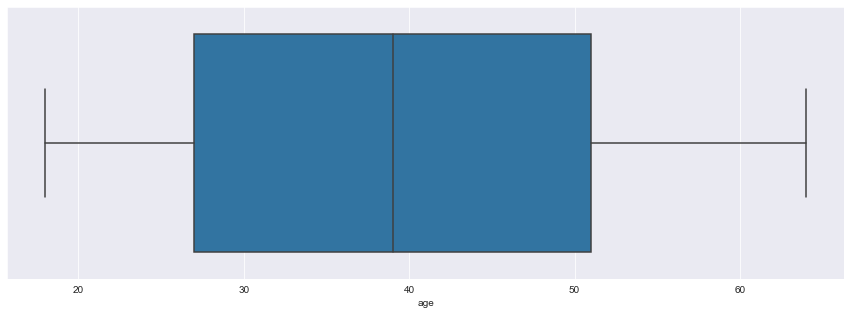

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='age');

## <font color='red'>e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.</font>

### By using describe() function, we can numerically know the distribution of an attribute through mean, standard deviation and 5-point summary, which will give us a fair idea how the data in each attribute is distributed. We can visualize the same distribution using histograms along with kde distribution using seaborn or matplotlib libraries. Below are the visual representation of distribution of all three attributes:  

<Figure size 2000x1600 with 0 Axes>

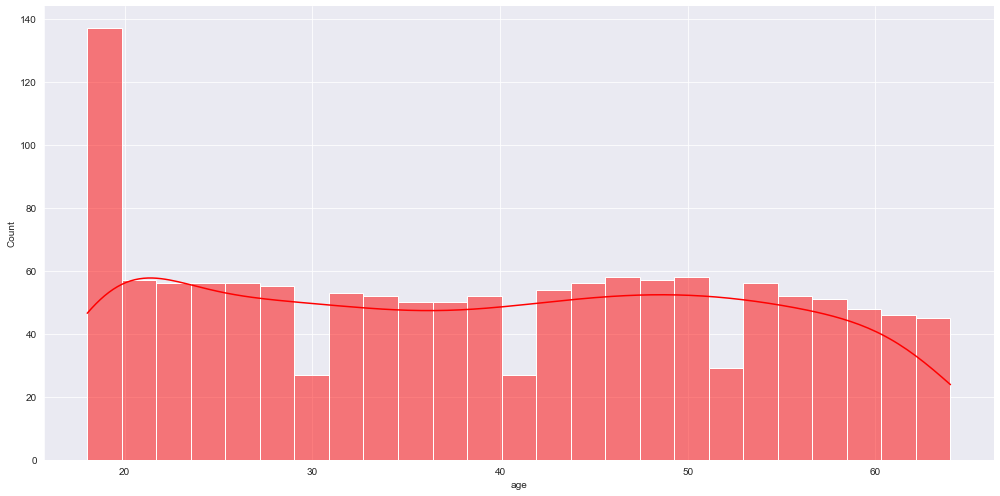

In [11]:
#Distribution of Age
plt.figure(figsize=(10,8),dpi=200)
sns.displot(data=df,x='age',kde=True,aspect=2,height=7,bins=25,color='red')
plt.show()

<Figure size 2000x1000 with 0 Axes>

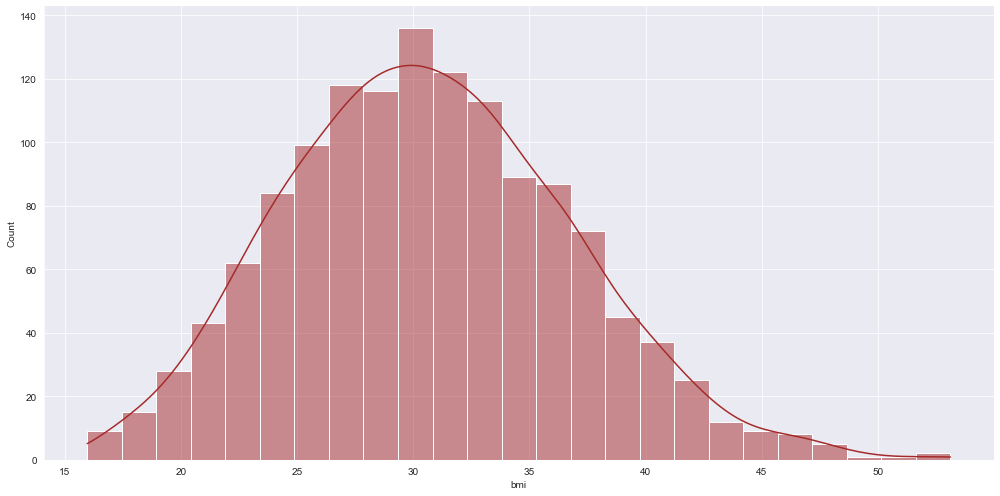

In [12]:
#Distribution of BMI
plt.figure(figsize=(10,5),dpi=200)
sns.displot(data=df,x='bmi',kde=True,aspect=2,height=7,bins=25,color='brown');

<Figure size 2000x1600 with 0 Axes>

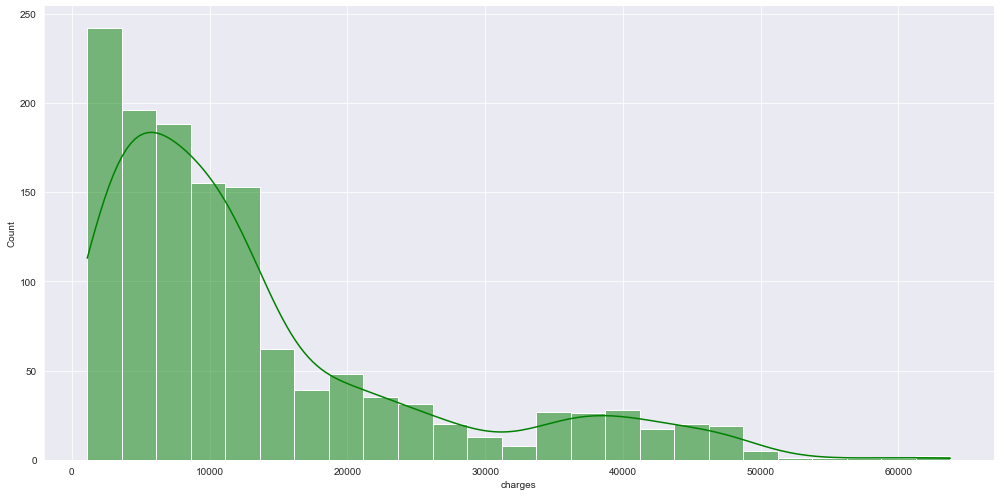

In [13]:
#Distribution of Charges
plt.figure(figsize=(10,8),dpi=200)
sns.displot(data=df,x='charges',kde=True,aspect=2,height=7,bins=25,color='green');

### The above three distributions can also be plotted together using matplotlib subplots, as shown below: (I have also plotted mean and median of every attribute to get the idea of skewness of each attribute plotted.)

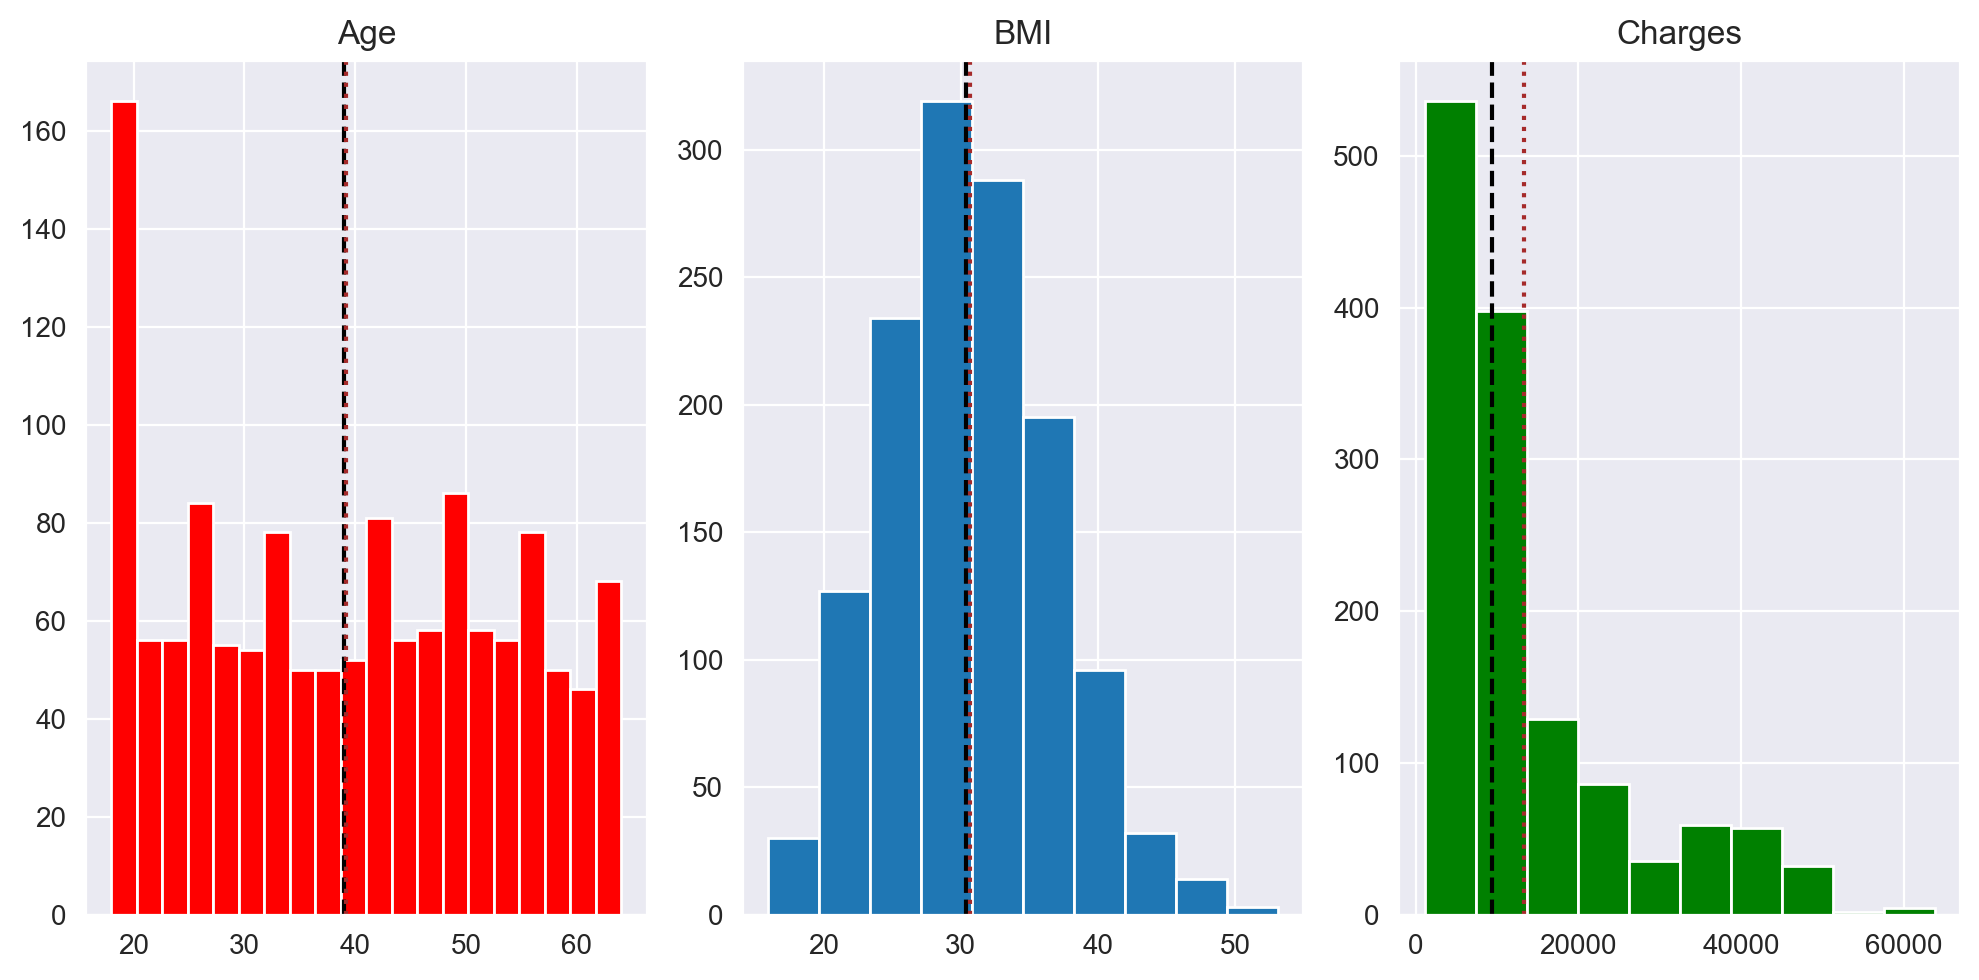

In [14]:
fig,ax = plt.subplots(ncols=3,figsize=(10,5),dpi=200)

ax[0].hist(df['age'],color='red',bins=20)
ax[0].axvline(df['age'].median(),color='black',linestyle='--')
ax[0].axvline(df['age'].mean(),color='brown',linestyle=':')
ax[0].set_title('Age')

ax[1].hist(df['bmi'])
ax[1].axvline(df['bmi'].median(),color='black',linestyle='--')
ax[1].axvline(df['bmi'].mean(),color='brown',linestyle=':')
ax[1].set_title('BMI')

ax[2].hist(df['charges'],color='green')
ax[2].axvline(df['charges'].median(),color='black',linestyle='--')
ax[2].axvline(df['charges'].mean(),color='brown',linestyle=':')
ax[2].set_title('Charges')

plt.tight_layout()

## <font color='red'>f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns</font>

### Measure of skewness can be measured with skew() function. 

### Skewness is measured by the following formula:

$$skewness = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^3} {(n-1)*\sigma^3}$$

### Mean > Median : Positive or right tailed distribution
### Mean = Median: Zero skewness or symmetrical distribution
### Mean < Median : Negative or left tailed distribution

In [15]:
df[['age','bmi','charges']].skew() #Measuring skewness of Age, BMI and Charges columns

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

### It shows that age and bmi are more or less symmetric around their respective mean and approximately normally distributed, whereas charges is skewed and has a right-tailed distribution, as can be visualize in the above distribution plots as well.

### We can also visualize the skewness using kde plots as shown below:

<AxesSubplot:xlabel='age', ylabel='Density'>

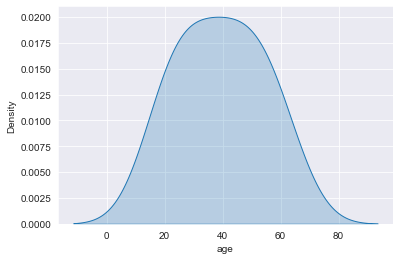

In [16]:
#Visualizing Skewness in Age column
sns.kdeplot(data=df,x='age',shade=True,bw_method=0.7)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

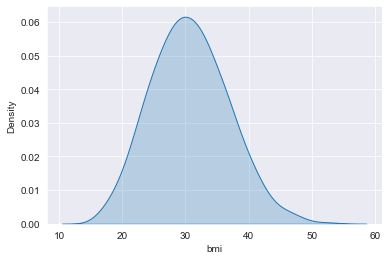

In [17]:
#Visualizing Skewness in BMI column
sns.kdeplot(data=df,x='bmi',shade=True,bw_method=0.3)

<AxesSubplot:xlabel='charges', ylabel='Density'>

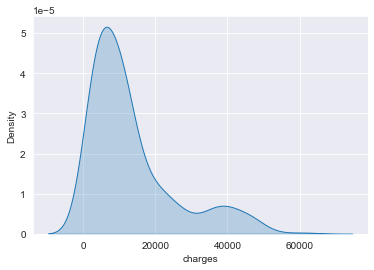

In [18]:
#Visualizing Skewness in Charges column
sns.kdeplot(data=df,x='charges',shade=True,bw_method=0.3)

## <font color='red'>g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns</font>

### Box-plots are the best way to check for the outliers in any numerical attribute. If any value goes less than (1.5 x Inter-Quartile Range) below Quartile 1 (Q1 - 1.5x(Q3-Q1)) or 1.5 x IQR above Quartile 3 (Q3 + 1.5x(Q3-Q1)), then box-plot marks them as outliers.

<AxesSubplot:xlabel='age'>

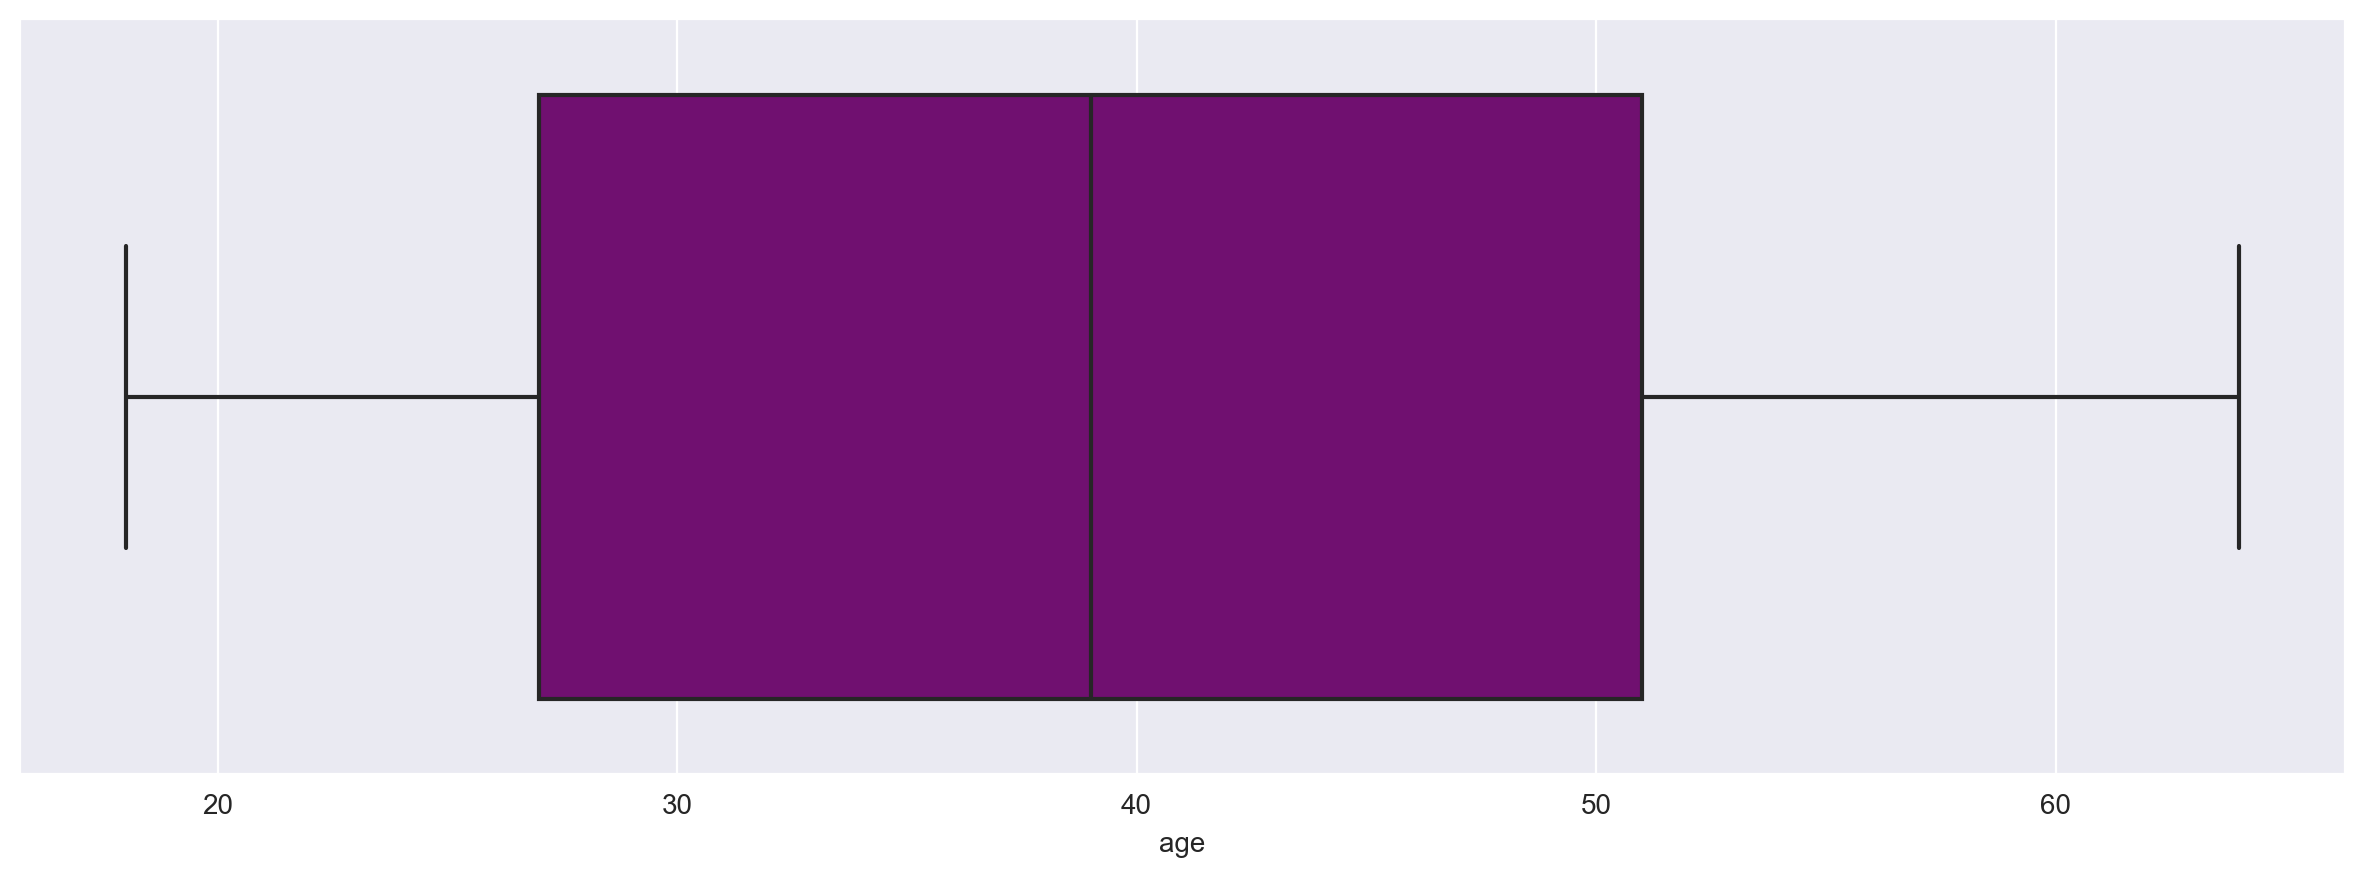

In [19]:
#Detecting presence of outliers in Age column
plt.figure(figsize=(15,5),dpi=200)
sns.boxplot(data=df,x='age',color='purple')
#There are no outliers in Age column

<AxesSubplot:xlabel='bmi'>

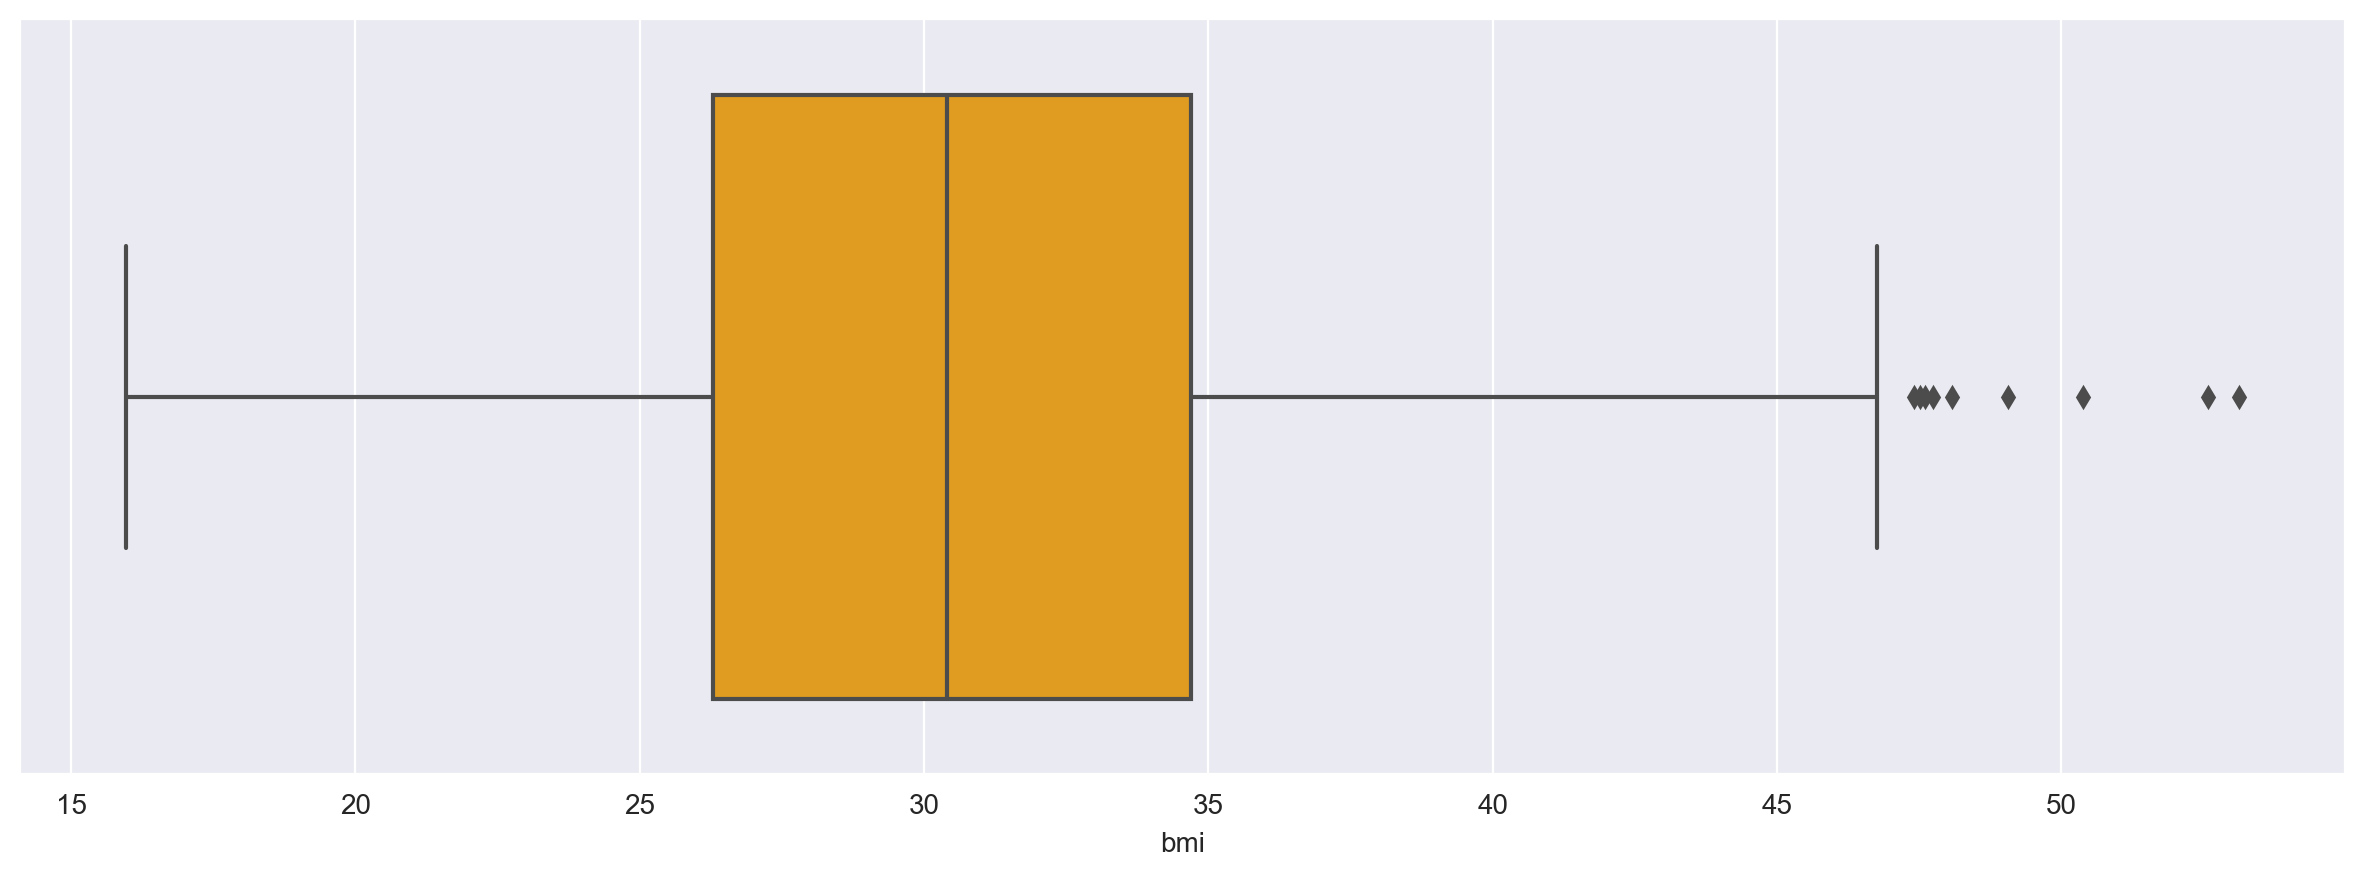

In [20]:
#Detecting presence of outliers in BMI column
plt.figure(figsize=(15,5),dpi=200)
sns.boxplot(data=df,x='bmi',color='orange')
#There are outliers in this column

<AxesSubplot:xlabel='charges'>

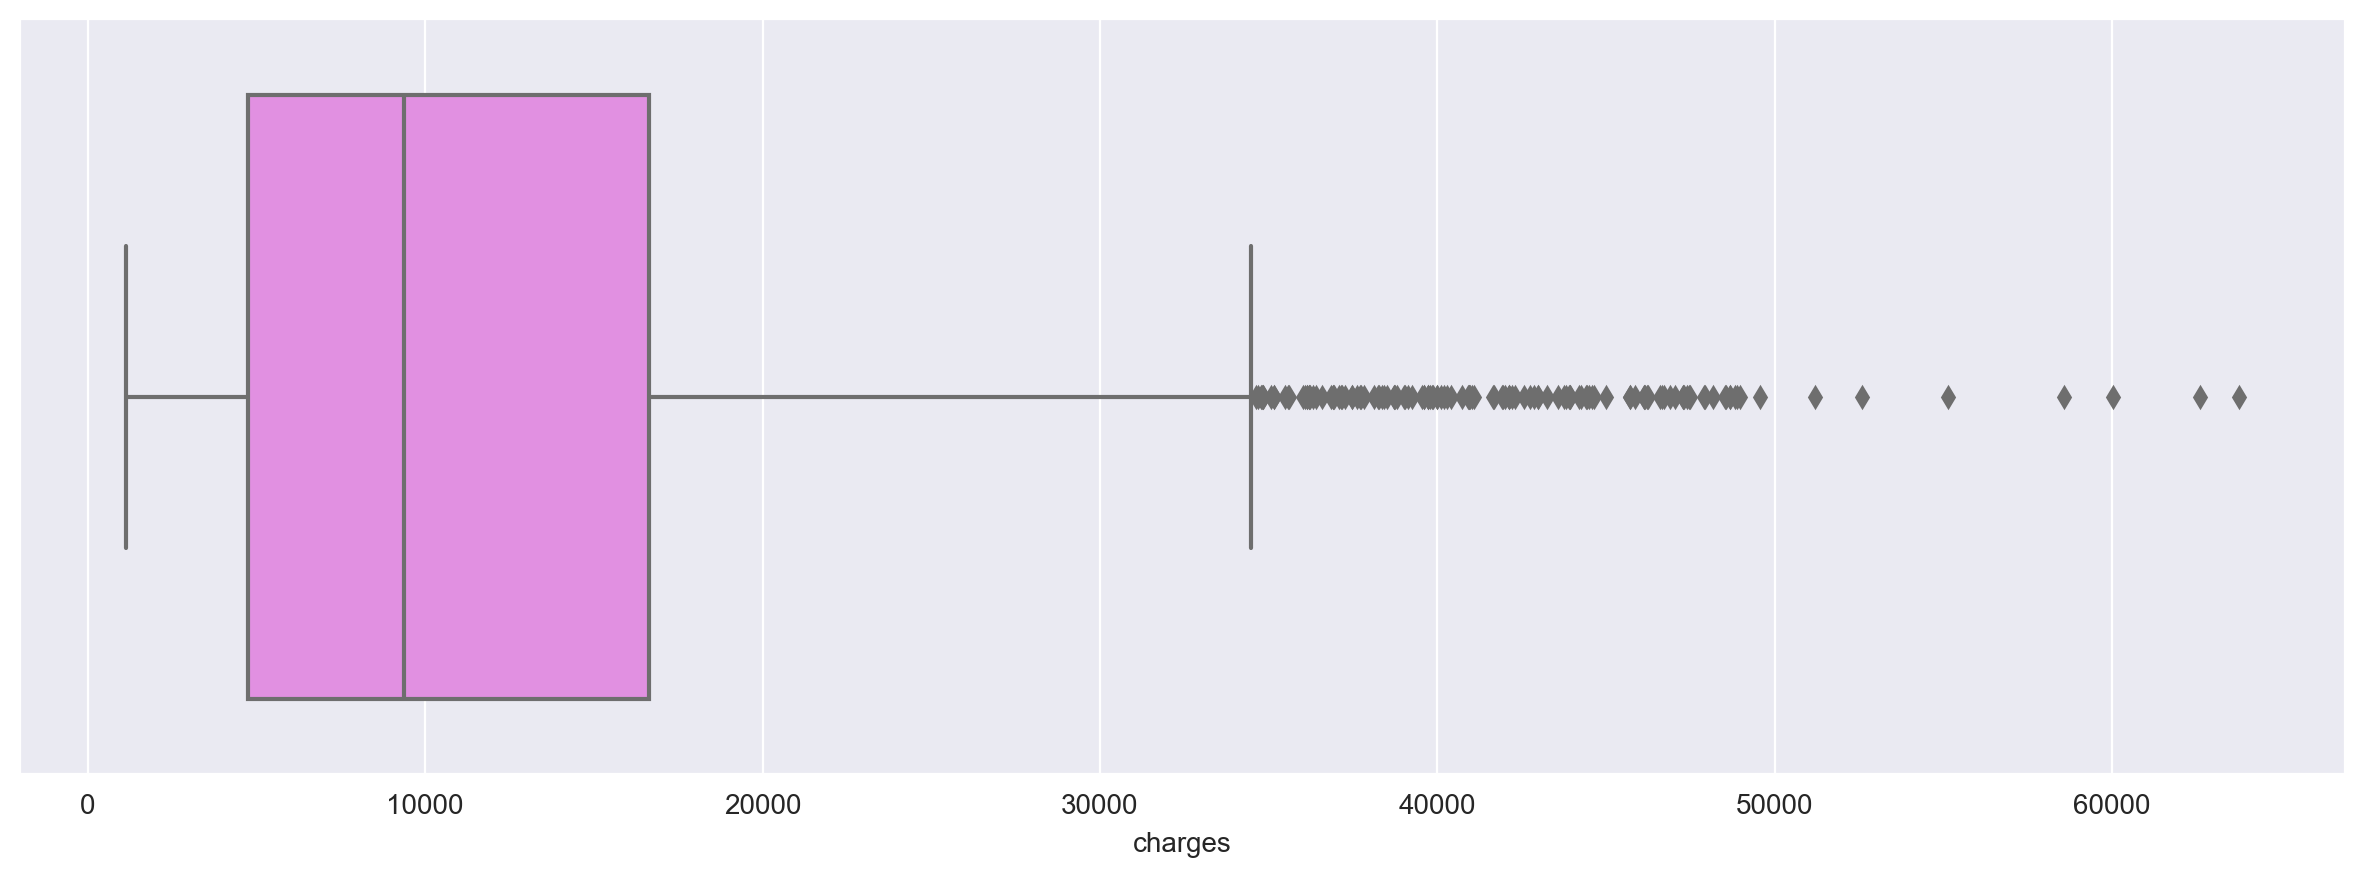

In [21]:
#Detecting presence of outliers in Charges column
plt.figure(figsize=(15,5),dpi=200)
sns.boxplot(data=df,x='charges',color='violet')
#There are outliers in this column

### We can plot all the three box-plots together using matplotlib subplots. 

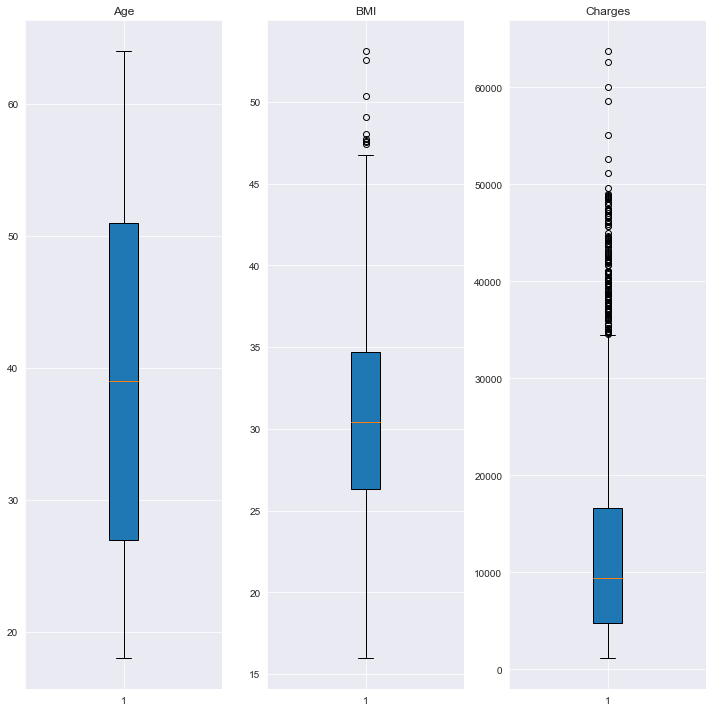

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,10))

ax[0].boxplot(df['age'],patch_artist=True)
ax[0].set_title("Age")

ax[1].boxplot(df['bmi'],patch_artist=True)
ax[1].set_title("BMI")


ax[2].boxplot(df['charges'],patch_artist=True)
ax[2].set_title("Charges")

plt.tight_layout()


### We can also find those outliers using either (Q1 - 1.5x(Q3-Q1)) or (Q3 + 1.5x(Q3-Q1)). From the plots, we can see that outliers are only present beyond our upper limit.

In [23]:
#Outliers in BMI
upperlimit_bmi = df['bmi'].quantile(q=0.75) + 1.5 * (df['bmi'].quantile(q=0.75) - df['bmi'].quantile(q=0.25))
print('The number of outliers in BMI are:', len(df[df['bmi'] > upperlimit_bmi]))
print('Following are the outliers')
df[df['bmi'] > upperlimit_bmi]['bmi']

The number of outliers in BMI are: 9
Following are the outliers


116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [24]:
#Outliers in Charges
upperlimit_charges = np.percentile(df['charges'],75) + 1.5*(np.percentile(df['charges'],75) - 
                                                            np.percentile(df['charges'],25))
print('The number of outliers in Charges attribute is:',len(df[df['charges'] > upperlimit_charges]))
print('Following are the outliers in Charges:')
df[df['charges'] > upperlimit_charges]['charges']

The number of outliers in Charges attribute is: 139
Following are the outliers in Charges:


14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

## <font color='red'>h. Distribution of categorical columns(include children)</font>

### Distribution of the categorical columns can be best shown using frequency/count plots, as shown below:

<Figure size 3000x1000 with 0 Axes>

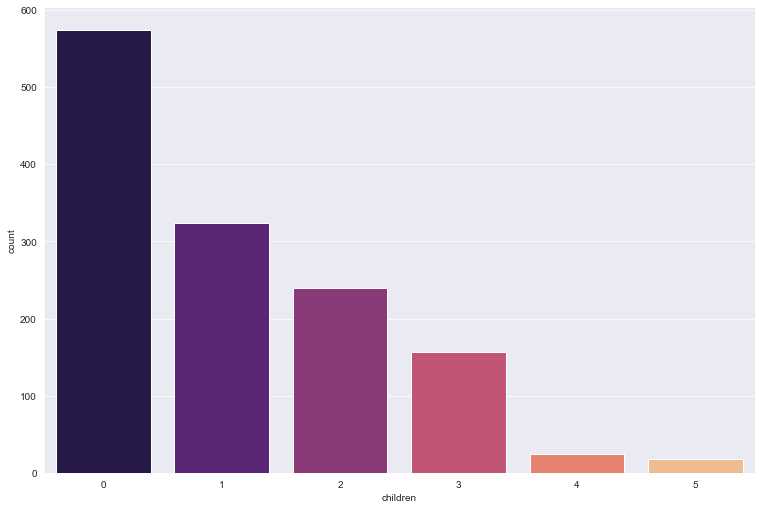

In [25]:
#Distribution of Children
plt.figure(figsize=(15,5),dpi=200)
sns.catplot(data=df,x='children',kind='count',height=7,aspect=1.5,palette='magma')

<Figure size 3000x1000 with 0 Axes>

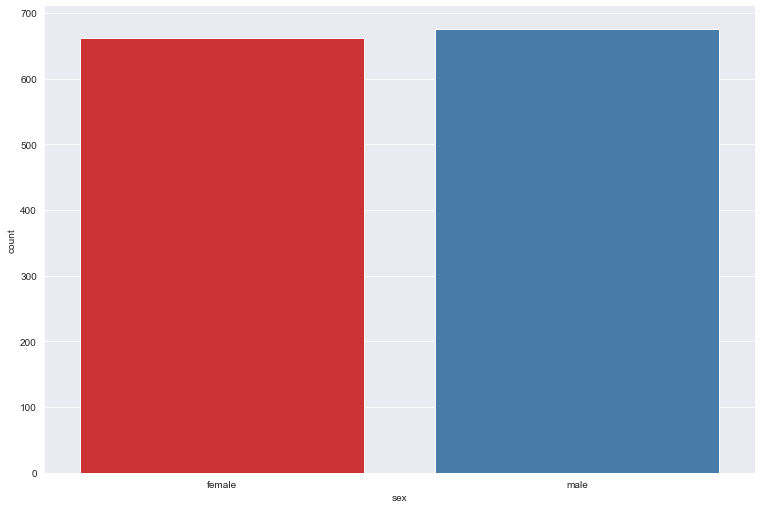

In [26]:
#Distribution of Genders
plt.figure(figsize=(15,5),dpi=200)
sns.catplot(data=df,x='sex',kind='count',height=7,aspect=1.5,palette='Set1')

<Figure size 3000x1000 with 0 Axes>

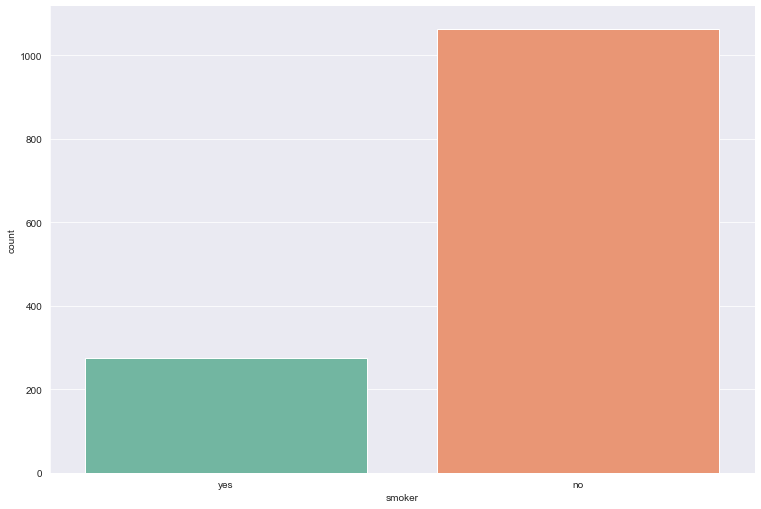

In [27]:
#Distribution of Smokers and non-smokers
plt.figure(figsize=(15,5),dpi=200)
sns.catplot(data=df,x='smoker',kind='count',height=7,aspect=1.5,palette='Set2')

<Figure size 3000x1000 with 0 Axes>

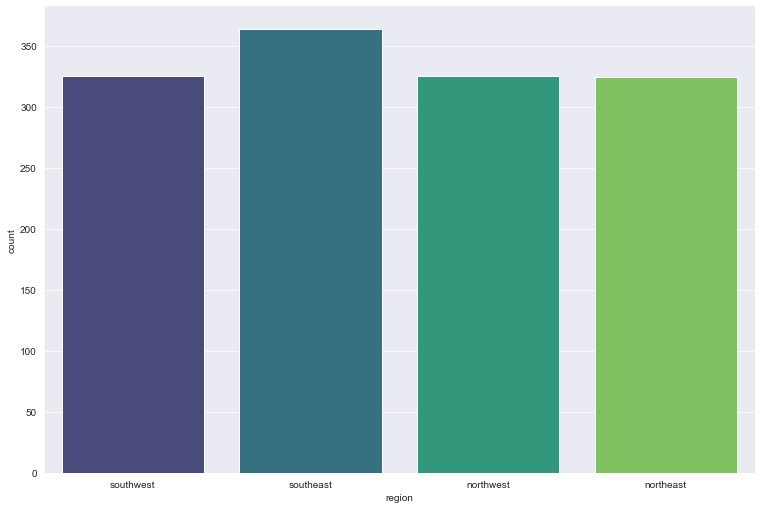

In [28]:
#Distribution of Regions
plt.figure(figsize=(15,5),dpi=200)
sns.catplot(data=df,x='region',kind='count',height=7,aspect=1.5,palette='viridis')

### We can also plot all the categorical attributes in the same plot but reading and interpreting them would become difficult. Hence, it is not advisable to plot all of them together. 

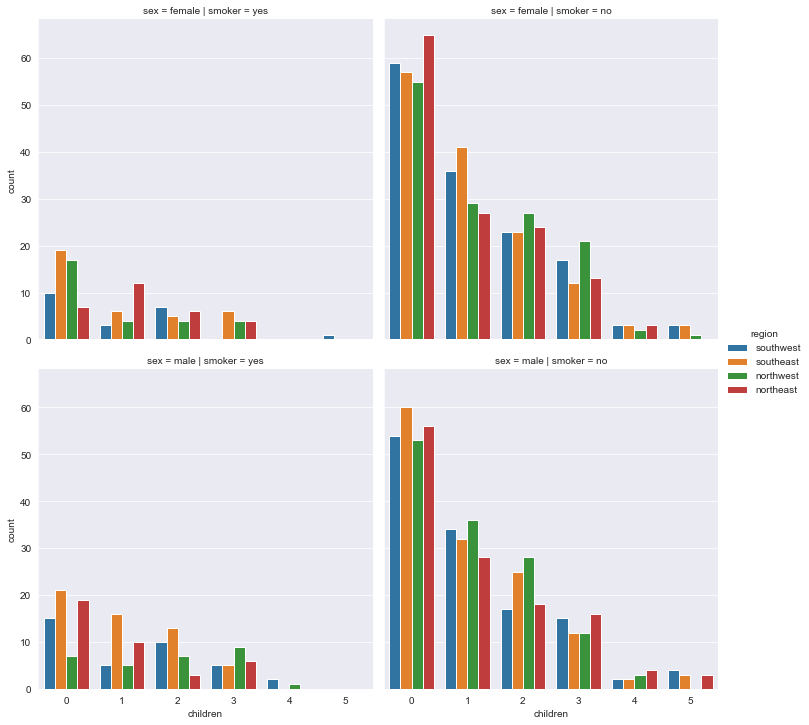

In [29]:
sns.catplot(data=df,x='children',hue='region',row='sex',col='smoker',kind='count')

## <font color='red'>i. Pair plot that includes all the columns of the data frame</font>

### Following is the pair-plots of all the columns of the data-set together:

<Figure size 1500x1000 with 0 Axes>

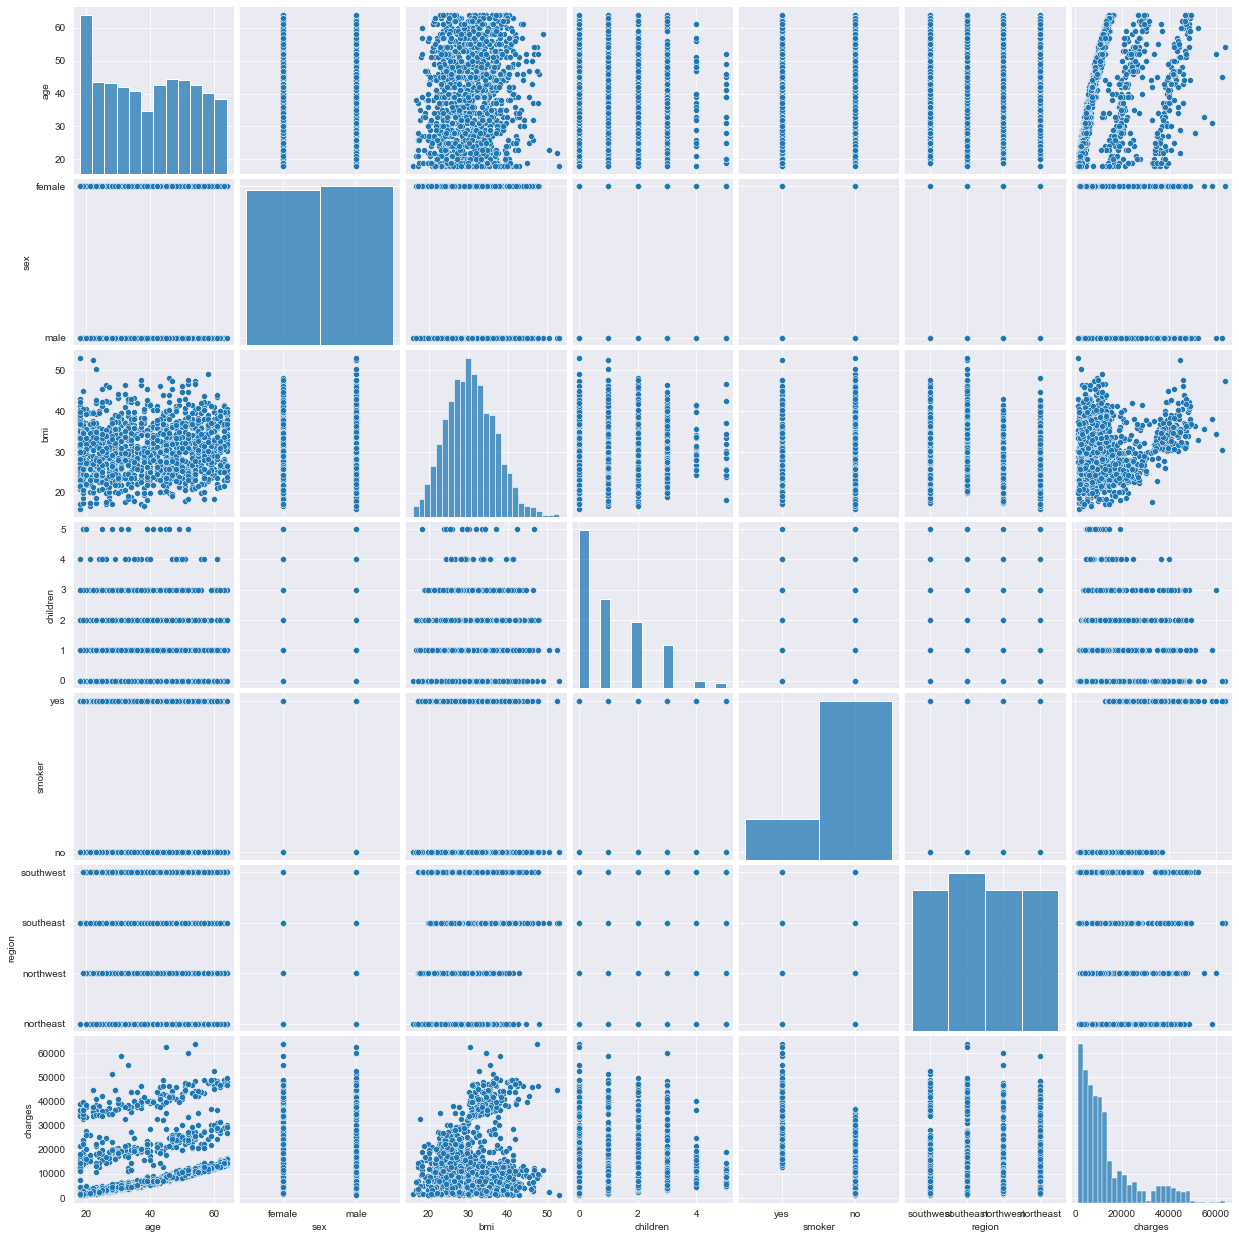

In [30]:
plt.figure(dpi=250)
sns.pairplot(data=df,vars=df.columns)

## <font color='red'>4. Answer the following questions with statistical evidence</font>

## <font color='red'>a. Do charges of people who smoke differ significantly from the people who don't?</font>

### We can find out whether charges of people who smoke differ significantly from the people who don't using t-test of 2 independent samples, where two samples being charges of people who smoke and the charges of people who do not smoke:

### We can define our Null and Alternate Hypothesis as following:

### Ho: $\mu$1 = $\mu$2 , i.e. Means of both the samples taken are equal.

### Ha: $\mu$1 $\neq$ $\mu$2 , i.e, Means of both the samples are not equal.

### Let's also define our level of significance assuming we want 95% confidence level:
## <center>$\alpha$ = 0.05</center>

### Rules for rejection or failure of rejection of Null Hypothesis are:
### If, P-value > $\alpha$ : We would fail to reject our Null Hypothesis (Since our t-statistic would fall in the acceptance region.)
### else, P-value < $\alpha$ : We would reject our Null Hypothesis (Since our t-statistic would fall in rejection region.)

In [31]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [32]:
smoker_yes = df[df['smoker']== 'yes'] # Dataframe of the people who smoke

In [33]:
smoker_no = df[df['smoker'] == 'no'] # Dataframe of the people who do not smoke

In [34]:
tstat , pval = stats.ttest_ind(smoker_yes['charges'],smoker_no['charges']) #T-Test of two samples
print('T-statistic is:', tstat,'\nP-value is:', pval)

T-statistic is: 46.664921172723716 
P-value is: 8.271435842177219e-283


### From the above analysis, we can see that <font color='blue'>t-statistic is 46.66</font>, which implies that the means of two samples are 46.66 units away  and the <font color='blue'>p-value is almost 0, which is way lower than our level of significance, 0.05.</font>. Hence we can conclude that the <font color='blue'>Charges of smokers and non-smokers belong to two different populations and the Charges of people who smoke differ significantly from the people who do not</font> 

### <font color='blue'>Hence, we can reject our Null Hypothesis.</font>

In [35]:
if pval < 0.05:
    print("Charges of people who smoke differ significantly from the people who don't")
else:
    print("charges of people who smoke do not differ significantly from the people who don't")

Charges of people who smoke differ significantly from the people who don't


## <font color='red'>b. Does bmi of males differ significantly from that of females?</font>

### Again, in this problem, we can use t-test of 2 independent samples to find out whether BMI of males differ significantly from that of females or not. One sample being BMI of males and the other being BMI of females:

### We can define our Null and Alternate Hypothesis as following:

### Ho: $\mu$1 = $\mu$2 , i.e. Means of both the samples taken are equal.

### Ha: $\mu$1 $\neq$ $\mu$2 , i.e, Means of both the samples are not equal.

### Let's also define our level of significance assuming we want 95% confidence level:
## <center>$\alpha$ = 0.05</center>

### Rules for rejection or failure of rejection of Null Hypothesis are:
### If, P-value > $\alpha$ : We would fail to reject our Null Hypothesis (Since our t-statistic would fall in the acceptance region.)
### else, P-value < $\alpha$ : We would reject our Null Hypothesis (Since our t-statistic would fall in rejection region.)

In [36]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [37]:
males = df[df['sex'] == 'male'] # Males in our dataframe
females = df[df['sex'] == 'female'] # Females in our dataframe

In [38]:
tstat_bmi , pval_bmi = stats.ttest_ind(males['bmi'],females['bmi']) #T-test of two independent samples
print('t-stat =',tstat_bmi,'\nP-value=',pval_bmi)

t-stat = 1.696752635752224 
P-value= 0.08997637178984932


### Here, we can see that <font color='blue'>t-statistic is only 1.69</font>, which means that the means of the 2 samples taken are just 1.69 units away, which is not significantly far away and does belong to the same population as told us by the <font color='blue'>P-Value = 0.0899, which is greater than 0.05, which is our level of significance.</font>

### <font color='blue'>Hence, we failed to reject our Null Hypothesis.</font>

## <font color='red'>c. Is the proportion of smokers significantly different in different genders?</font>

### In this, we can perform the z-test on proportions of Male smokers and Female smokers

### We can define our Null and Alternate Hypothesis as following:

### Ho: p1 = p2 , i.e. Proportions of both the samples taken are equal.

### Ha: p1 $\neq$ p2 , i.e, Proportions of both the samples are not equal.

### Let's also define our level of significance assuming we want 95% confidence level:
## <center>$\alpha$ = 0.05</center>

### Rules for rejection or failure of rejection of Null Hypothesis are:
### If, P-value > $\alpha$ : We would fail to reject our Null Hypothesis (Since our z-statistic would fall in the acceptance region.)
### else, P-value < $\alpha$ : We would reject our Null Hypothesis (Since our z-statistic would fall in rejection region.)

In [39]:
male_smokers= males.smoker.value_counts()[1] # Number of Males in our dataframe who smoke
female_smokers = females.smoker.value_counts()[1] # Number of Females in our dataframe who smoke

In [40]:
print('Number of Male Smokers:', male_smokers)
print('Total number of Males:', len(males))
print('Number of female smokers:', female_smokers)
print('Total number of females:', len(females))

Number of Male Smokers: 159
Total number of Males: 676
Number of female smokers: 115
Total number of females: 662


In [41]:
from statsmodels.stats.proportion import proportions_ztest #Importing required proportion's test
tstat_prop , pval_prop = proportions_ztest([male_smokers,female_smokers],[len(males),len(females)])
print('Z-statistic is:', tstat_prop,'\nP-value is:',pval_prop)

Z-statistic is: 2.7867402154855503 
P-value is: 0.005324114164320532


### As we can see that both the proportions are 2.786 units away from each other which is significantly different as told us by the <font color='blue'>P-Value = 0.00532, which is much lower than our level of significance which is 0.05. Hence, we can conclude that the proportion of smokers are significantly different in different genders</font>. 

### <font color='blue'>Hence, we can reject our Null Hypothesis.</font>

## <font color='red'>d. Is the distribution of bmi across women with no children, one child and two children, the same?</font>

### We can find this by doing one-way ANOVA test on the three samples that are:
### Sample 1: Women with no children
### Sample 2: Women with 1 child
### Sample 3: Women with 2 children

### We can define our Null and Alternate Hypothesis as following:

### Ho: $\mu$1 = $\mu$2 = $\mu$3 , i.e. Means of all the samples taken are equal.

### Ha: $\mu$1 $\neq$ $\mu$2 = $\mu$3, i.e, Means of either two or more samples are not equal.
### or Ha: $\mu$1 = $\mu$2 $\neq$ $\mu$3
### or Ha: $\mu$1 $\neq$ $\mu$3 = $\mu$2
### or Ha: $\mu$1 $\neq$ $\mu$2 $\neq$ $\mu$3

### Let's also define our level of significance assuming we want 95% confidence level:
## <center>$\alpha$ = 0.05</center>

### Rules for rejection or failure of rejection of Null Hypothesis are:
### If, P-value > $\alpha$ : We would fail to reject our Null Hypothesis (Since our t-statistic would fall in the acceptance region.)
### else, P-value < $\alpha$ : We would reject our Null Hypothesis (Since our t-statistic would fall in rejection region.)

In [107]:
pd.pivot_table(data=df,values='bmi',index='children',columns='sex') #Pivot table to numerically see
                                                                    # the difference in BMI

sex,female,male
children,,
0,30.361522,30.741719
1,30.052658,31.166145
2,30.649790,31.300992
3,30.436429,30.922937
4,31.943182,30.957500
5,30.620625,28.792500


In [108]:
female_bmi = females[females['children'] < 3][['children','bmi']] #Segregating women with 0,1 or 2 kids
female_bmi.children.value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

In [109]:
import statsmodels.api         as     sm 
from   statsmodels.formula.api import ols #Importing the required libraries to perform Anova test

In [110]:
mod = ols('bmi ~ children', data = female_bmi).fit() # First we have fit our linear model using
                                                     # Ordinary Least Squares (ols) method
anova_tab = sm.stats.anova_lm(mod,typ=2) # Using our model to perform Anova test 
print(anova_tab) #Printing the results of our Anova test in the form of a table

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


### Since our <font color='blue'>P-value = 0.793</font>, which is much greater than our level of significance, which is 0.05, we can conclude than <font color='blue'>the distribution of bmi across women with no children, one child and two children is the same</font>

### <font color='blue'>Hence, we failed to reject our Null Hypothesis.</font>

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(female_bmi['bmi'],female_bmi['children'])) 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


### We can see the individual comparisons of the means using pairwise_tukeyhsd() function. The last column of this table tells us whether we should reject our Null Hypothesis in that particular comparison of the means or not. Since, in all the three comparisons, we failed to reject our Null Hypothesis, hence it is False for all three of them.